# LDA线性判别法算法实现

## 导入所需要的包

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import matplotlib
%matplotlib inline

## 定义LDA函数

In [12]:
def LDA(X, y, n):
    #处理数据
    labels = set(y)
    xClasses = {}
    for label in labels:
        xClasses[label] = np.array([X[i] for i in range(len(X)) if y[i] == label])
    #第0类，第1类，第二类分别50条数据，4个属性，matrix50*4

    # 求总体均值,matrix1*4
    mean_All = np.mean(X, axis=0)

    # 求各类均值
    #3个类，4个属性，每个类matrix1*4
    meanClasses = {}
    for label in labels:
        meanClasses[label] = np.mean(xClasses[label], axis=0)

    # 求全局散步矩阵St
    #（matrix4*150 ）* （matrix150*4） =matrix 4*4
    d1 = len(mean_All)
    St = np.zeros([d1, d1])
    for label in labels:
        St += np.dot((xClasses[label] - mean_All).T, (xClasses[label] - mean_All))

    # 求类内散布矩阵Sw,
    #3个类,每类Si=（matrix4*50 ）* （matrix50*4） =matrix 4*4，Sw = S1+S2+S3
    Sw = np.zeros([d1, d1])
    for label in labels:
        Sw += np.dot((xClasses[label] - meanClasses[label]).T, (xClasses[label] - meanClasses[label]))

    # 求类间散布矩阵Sb
    Sb = St - Sw

    # 求Sw-1*Sb的特征值和特征矩阵
    eigenValues, eigenVectors = np.linalg.eig(np.dot(np.linalg.inv(Sw), Sb))

    # 提取前n个特征向量，matrix150*n
    sortedIndices = np.argsort(np.abs(eigenValues))
    #向量切片，从0开始到-n-1结束，步数为-1
    W = eigenVectors[:,sortedIndices[:-n-1:-1]]
    
    return W

In [13]:
# 1/读取数据集
X = load_iris().data
y = load_iris().target

# 2、LDA特征提取
W = LDA(X,y,2)
newX = np.dot(X,W)


## 画图

Text(0.5,1,'Sklearn库实现')

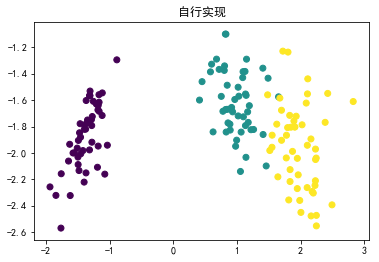

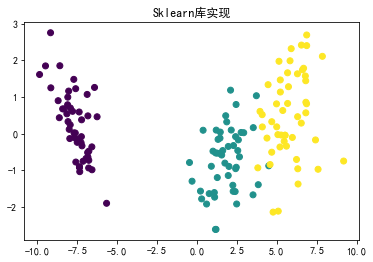

In [14]:
 #3、绘图
matplotlib.rcParams['font.sans-serif'] = ['SimHei']#用来
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure(1)
#c=y即颜色以类别0,1,2不同颜色显示
plt.scatter(newX[:,0],newX[:,1], c = y,marker = 'o')
plt.title('自行实现')

#与sklearn自带函数对比
lda_Sklearn = LinearDiscriminantAnalysis(n_components = 2)
lda_Sklearn.fit(X,y)
newX1 = lda_Sklearn.transform(X)
plt.figure(2)
plt.scatter(newX1[:,0],newX1[:,1],c = y,marker = 'o')
plt.title('Sklearn库实现')

In [15]:
from collections import Counter
a = Counter(y)
print(a)

Counter({0: 50, 1: 50, 2: 50})


In [19]:
X = load_iris().data
y = load_iris().target
labels = set(y)
xClasses = {}
for label in labels:
    xClasses[label] = np.array([X[i] for i in range(len(X)) if y[i] == label])
print(xClasses)


In [17]:
meanClasses = {}
for label in labels:
    meanClasses[label] = np.mean(xClasses[label],axis = 0)
print(meanClasses)



{0: array([5.006, 3.418, 1.464, 0.244]), 1: array([5.936, 2.77 , 4.26 , 1.326]), 2: array([6.588, 2.974, 5.552, 2.026])}


In [18]:
A = xClasses[0] - meanClasses[0]
print(np.dot((A.T), A))

[[6.0882 4.9146 0.7908 0.5168]
 [4.9146 7.1138 0.5724 0.5604]
 [0.7908 0.5724 1.4752 0.2792]
 [0.5168 0.5604 0.2792 0.5632]]
